<a href="https://colab.research.google.com/github/yashraj02/CNN-Animals_Classification/blob/master/MNIST_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
import numpy as np
from keras.layers import Conv2D,Activation,MaxPool2D,Flatten,Dense
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [80]:
x_train = x_train[..., np.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


In [81]:
x_test = x_test[..., np.newaxis]
print(x_test.shape)

(10000, 28, 28, 1)


In [82]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [0]:
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

In [0]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [0]:
def leNet_model(width, height, channels,classes):
  model = Sequential()
  
  model.add(Conv2D(20,(5,5),input_shape=(height,width,channels)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(50,(5,5)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(2,2))
  model.add(Flatten())

  model.add(Dense(500))
  model.add(Activation('relu'))

  model.add(Dense(classes))
  model.add(Activation('softmax'))

  return model

In [91]:
model = leNet_model(28,28,1,10)
opti = SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opti, metrics=['accuracy'])

print("[INFO] training network...")
H = model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=128, epochs=20, verbose=1)

[INFO] training network...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 45s 747us/step - loss: 1.5469 - accuracy: 0.6194 - val_loss: 0.5129 - val_accuracy: 0.8681
Epoch 2/20
60000/60000 [==============================] - 45s 747us/step - loss: 0.3938 - accuracy: 0.8888 - val_loss: 0.2933 - val_accuracy: 0.9141
Epoch 3/20
60000/60000 [==============================] - 44s 742us/step - loss: 0.2750 - accuracy: 0.9193 - val_loss: 0.2497 - val_accuracy: 0.9251
Epoch 4/20
60000/60000 [==============================] - 45s 747us/step - loss: 0.2213 - accuracy: 0.9353 - val_loss: 0.1857 - val_accuracy: 0.9460
Epoch 5/20
60000/60000 [==============================] - 45s 748us/step - loss: 0.1856 - accuracy: 0.9457 - val_loss: 0.1563 - val_accuracy: 0.9560
Epoch 6/20
60000/60000 [==============================] - 45s 746us/step - loss: 0.1612 - accuracy: 0.9523 - val_loss: 0.1340 - val_accuracy: 0.9625
Epoch 7/20
60000/60000 [=====

In [96]:
predictions = model.predict(x_test,batch_size=128)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



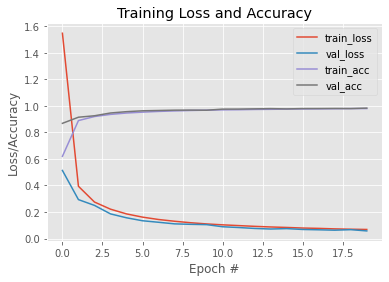

In [93]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

This plot demonstrating the loss and accuracy of LeNet on MNIST is arguably the quintessential
graph we are looking for: the training and validation loss and accuracy mimic each other (nearly) exactly with no signs of overfitting. It’s often very hard to obtain this type of training
plot that behaves so nicely, indicating that our network is learning the underlying patterns without
overfitting.